In [1]:
%matplotlib inline
%pylab inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import xarray as xr
import copy
import csv
from collections import OrderedDict

import xgcm


import matplotlib



from dask.distributed import Client
import climtas.nci

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg_c1', '025deg_c1', '01deg_c1', '1deg_c2', '025deg_c2', '01deg_c2', '1deg_c3', '025deg_c3', '01deg_c3']


In [2]:
import climtas.nci
climtas.nci.GadiClient(malloc_trim_threshold='64kib')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 8
Total threads: 8,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36879,Workers: 8
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 128.00 GiB
Comm: tcp://127.0.0.1:35695,Total threads: 1
Dashboard: /proxy/39493/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:38677,


In [3]:
session = cc.database.create_session()

In [4]:
data = copy.deepcopy(exptdata.exptdict) 

### Find the current location

In [5]:
# #East Australian current
# data['1deg_c1']['straits'] = OrderedDict([('East Australian Current', [-208, -201, -27, -27])])
# data['025deg_c1']['straits'] = OrderedDict([('East Australian Current', [-208, -205, -27, -27])])
# data['01deg_c1']['straits'] = OrderedDict([('East Australian Current', [-208, -205, -27, -27])])

# data['1deg_c2']['straits'] = OrderedDict([('East Australian Current', [-208, -201, -27, -27])])
# data['025deg_c2']['straits'] = OrderedDict([('East Australian Current', [-208, -205, -27, -27])])
# data['01deg_c2']['straits'] = OrderedDict([('East Australian Current', [-208, -205, -27, -27])])

# data['1deg_c3']['straits'] = OrderedDict([('East Australian Current', [-208, -201, -27, -27])])
# data['025deg_c3']['straits'] = OrderedDict([('East Australian Current', [-208, -205, -27, -27])])
# data['01deg_c3']['straits'] = OrderedDict([('East Australian Current', [-208, -205, -27, -27])])

In [24]:
# #East Auckland current
# data['1deg_c1']['straits'] = OrderedDict([('East Auckland Current', [-186, -186, -35,-31])])
# data['025deg_c1']['straits'] = OrderedDict([('East Auckland Current', [-186, -186, -35,-32.5])])
# data['01deg_c1']['straits'] = OrderedDict([('East Auckland Current', [-186, -186, -35,-32.5])])

# data['1deg_c2']['straits'] = OrderedDict([('East Auckland Current', [-186, -186, -35,-31])])
# data['025deg_c2']['straits'] = OrderedDict([('East Auckland Current', [-186, -186, -35,-32.5])])
# data['01deg_c2']['straits'] = OrderedDict([('East Auckland Current', [-186, -186, -35,-32.5])])

# data['1deg_c3']['straits'] = OrderedDict([('East Auckland Current', [-186, -186, -35,-31])])
# data['025deg_c3']['straits'] = OrderedDict([('East Auckland Current', [-186, -186, -35,-32.5])])
# data['01deg_c3']['straits'] = OrderedDict([('East Auckland Current', [-186, -186, -35,-32.5])])

In [6]:
# #East Auckland current
# data['1deg_c1']['straits'] = OrderedDict([('East Auckland Current', [-182, -177, -36.5,-36.5])])
# data['025deg_c1']['straits'] = OrderedDict([('East Auckland Current', [-185, -181, -36.5,-36.5])])
# data['01deg_c1']['straits'] = OrderedDict([('East Auckland Current', [-185, -181, -36.5,-36.5])])

# data['1deg_c2']['straits'] = OrderedDict([('East Auckland Current', [-182, -177, -36.5,-36.5])])
# data['025deg_c2']['straits'] = OrderedDict([('East Auckland Current', [-185, -181, -36.5,-36.5])])
# data['01deg_c2']['straits'] = OrderedDict([('East Auckland Current', [-185, -181, -36.5,-36.5])])

# data['1deg_c3']['straits'] = OrderedDict([('East Auckland Current', [-182, -177, -36.5,-36.5])])
# data['025deg_c3']['straits'] = OrderedDict([('East Auckland Current', [-185, -181, -36.5,-36.5])])
# data['01deg_c3']['straits'] = OrderedDict([('East Auckland Current', [-185, -181, -36.5,-36.5])])

In [24]:
# #East Auckland current
# data['1deg_c1']['straits'] = OrderedDict([('East Auckland Current', [-182, -177, -37.5，-37.5])])
# data['025deg_c1']['straits'] = OrderedDict([('East Auckland Current', [-182, -179, -37.5,-37.5])])
# data['01deg_c1']['straits'] = OrderedDict([('East Auckland Current', [-182, -179, -37.5,-37.5])])

# data['1deg_c2']['straits'] = OrderedDict([('East Auckland Current', [-182, -177, -37.5,-37.5])])
# data['025deg_c2']['straits'] = OrderedDict([('East Auckland Current', [-182, -179, -37.5,-37.5])])
# data['01deg_c2']['straits'] = OrderedDict([('East Auckland Current', [-182, -179, -37.5,-37.5])])

# data['1deg_c3']['straits'] = OrderedDict([('East Auckland Current', [-182, -177, -37.5,-37.5])])
# data['025deg_c3']['straits'] = OrderedDict([('East Auckland Current', [-182, -179, -37.5,-37.5])])
# data['01deg_c3']['straits'] = OrderedDict([('East Auckland Current', [-182, -179, -37.5,-37.5])])

In [22]:
# EAC extension JK
data['1deg_c1']['straits'] = OrderedDict([('EAC extension', [-210, -200, -37, -37])])
data['025deg_c1']['straits'] = OrderedDict([('EAC extension', [-210, -207.5, -37, -37])])
data['01deg_c1']['straits'] = OrderedDict([('EAC extension', [-210, -207, -37, -37])])

data['1deg_c2']['straits'] = OrderedDict([('EAC extension', [-210, -200, -37, -37])])
data['025deg_c2']['straits'] = OrderedDict([('EAC extension', [-210, -207.5, -37, -37])])
data['01deg_c2']['straits'] = OrderedDict([('EAC extension', [-210, -207, -37, -37])])

data['1deg_c3']['straits'] = OrderedDict([('EAC extension', [-210, -200, -37, -37])])
data['025deg_c3']['straits'] = OrderedDict([('EAC extension', [-210, -207.5, -37, -37])])
data['01deg_c3']['straits'] = OrderedDict([('EAC extension', [-210, -207, -37, -37])])

In [11]:
# # Tasman Front
# data['1deg_c1']['straits'] = OrderedDict([('Tasman Front', [-187, -187, -34.4, -28])])
# data['025deg_c1']['straits'] = OrderedDict([('Tasman Front', [-187, -187, -34.4, -32])])
# data['01deg_c1']['straits'] = OrderedDict([('Tasman Front', [-187, -187, -34.4, -32])])

# data['1deg_c2']['straits'] = OrderedDict([('Tasman Front', [-187, -187, -34.4, -28])])
# data['025deg_c2']['straits'] = OrderedDict([('Tasman Front', [-187, -187, -34.4, -32])])
# data['01deg_c2']['straits'] = OrderedDict([('Tasman Front', [-187, -187, -34.4, -32])])

# data['1deg_c3']['straits'] = OrderedDict([('Tasman Front', [-187, -187, -34.4, -28])])
# data['025deg_c3']['straits'] = OrderedDict([('Tasman Front', [-187, -187, -34.4, -32])])
# data['01deg_c3']['straits'] = OrderedDict([('Tasman Front', [-187, -187, -34.4, -32])])

In [5]:
# # Strait locations: [minlon, maxlon, minlat, maxlat]
# # Add as many as you like, but they must be zonal or meridional

# data['1deg_c1']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
#             ('AB', [-212, -208, -43.5, -43.5]),
#             ('BC', [-208, -189, -43.5, -43.5]),   
#             ('FE', [-206.5, -202, -28, -28]),
#             ('ED', [-202, -187, -28, -28]),
#             ('DG', [-187, -187, -34.4, -28]),
#             ('LM', [-182, -177, -37.5, -37.5])])
# data['025deg_c1']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
#             ('AB', [-212.5, -210.7, -43.5, -43.5]),
#             ('BC', [-210.7, -189, -43.5, -43.5]),
#             ('FE', [-206.5, -205, -28, -28]),
#             ('ED', [-205, -187, -28, -28]),
#             ('DG', [-187, -187, -34.4, -28]),
#             ('LM', [-182, -179.6, -37.5, -37.5])])
# data['01deg_c1']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
#             ('AB', [-212.5, -210.3, -43.5, -43.5]),
#             ('BC', [-210.3, -189, -43.5, -43.5]),
#             ('FE', [-206.5, -205.2, -28, -28]),
#             ('ED', [-205.2, -187, -28, -28]),
#             ('DG', [-187, -187, -34.4, -28]),
#             ('LM', [-181, -179.7, -37.5, -37.5])])


# data['1deg_c2']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
#             ('AB', [-212, -208, -43.5, -43.5]),
#             ('BC', [-208, -189, -43.5, -43.5]),   
#             ('FE', [-206.5, -202, -28, -28]),
#             ('ED', [-202, -187, -28, -28]),
#             ('DG', [-187, -187, -34.4, -28]),
#             ('LM', [-182, -177, -37.5, -37.5])])
# data['025deg_c2']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
#             ('AB', [-212.5, -210.7, -43.5, -43.5]),
#             ('BC', [-210.7, -189, -43.5, -43.5]),
#             ('FE', [-206.5, -205, -28, -28]),
#             ('ED', [-205, -187, -28, -28]),
#             ('DG', [-187, -187, -34.4, -28]),
#             ('LM', [-182, -179.5, -37.5, -37.5])])
# data['01deg_c2']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
#             ('AB', [-212.5, -210.2, -43.5, -43.5]),
#             ('BC', [-210.2, -189, -43.5, -43.5]),
#             ('FE', [-206.5, -205.2, -28, -28]),
#             ('ED', [-205.2, -187, -28, -28]),
#             ('DG', [-187, -187, -34.4, -28]),
#             ('LM', [-181, -179.6, -37.5, -37.5])])


# data['1deg_c3']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
#             ('AB', [-212, -208, -43.5, -43.5]),
#             ('BC', [-208, -189, -43.5, -43.5]),   
#             ('FE', [-206.5, -202, -28, -28]),
#             ('ED', [-202, -187, -28, -28]),
#             ('DG', [-187, -187, -34.4, -28]),
#             ('LM', [-182, -177, -37.5, -37.5])])
# data['025deg_c3']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
#             ('AB', [-212.5, -210.6, -43.5, -43.5]),
#             ('BC', [-210.6, -189, -43.5, -43.5]),
#             ('FE', [-206.5, -205, -28, -28]),
#             ('ED', [-205, -187, -28, -28]),
#             ('DG', [-187, -187, -34.4, -28]),
#             ('LM', [-182, -179.5, -37.5, -37.5])])
# data['01deg_c3']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
#             ('AB', [-212.5, -210.2, -43.5, -43.5]),
#             ('BC', [-210.2, -189, -43.5, -43.5]),
#             ('FE', [-206.5, -205.2, -28, -28]),
#             ('ED', [-205.2, -187, -28, -28]),
#             ('DG', [-187, -187, -34.4, -28]),
#             ('LM', [-181, -179.6, -37.5, -37.5])])

### load data

In [18]:
# load data
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                       start_time='1958-01-01 00:00:00', 
                                       end_time='2019-12-31 00:00:00')
    e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                       start_time='1958-01-01 00:00:00', 
                                       end_time='2018-12-31 00:00:00')

    
#     if 'tx_trans_int_z' not in e:
#         e['tx_trans_int_z'] = cc.querying.getvar(e['expt'],'tx_trans_int_z', session,
#                                                 frequency = '1 monthly',
#                                                 start_time='1958-01-01 00:00:00', 
#                                                 end_time='2018-12-31 00:00:00')
#         e['ty_trans_int_z'] = cc.querying.getvar(e['expt'],'ty_trans_int_z', session,
#                                                 frequency = '1 monthly',
#                                                 start_time='1958-01-01 00:00:00', 
#                                                 end_time='2018-12-31 00:00:00')
# full depth transport
    e['tx_trans_int_z'] = cc.querying.getvar(e['expt'],'tx_trans_int_z', session,
                                             frequency = '1 monthly',
                                             start_time='1958-01-01 00:00:00', 
                                             end_time='2018-12-31 00:00:00')
    e['ty_trans_int_z'] =  e['ty_trans'].sum('st_ocean')
        
# 0-2000m transport      
    e['tx_trans_int_2000'] = e['tx_trans'].sel(st_ocean=slice(0,2000)).sum('st_ocean')
    e['ty_trans_int_2000'] = e['ty_trans'].sel(st_ocean=slice(0,2000)).sum('st_ocean')

1deg_c1
025deg_c1
01deg_c1


Exception during reset or similar
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 697, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 893, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/sqlalchemy/engine/default.py", line 558, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 22398830888768 and this is thread id 22393513453312.
Exception closing connection <sqlite3.Connection object at 0x145e7e14bb70>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/sqlalchemy/pool/b

1deg_c2
025deg_c2
01deg_c2
1deg_c3
025deg_c3
01deg_c3


2022-04-30 03:15:11,099 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-04-30 03:15:32,502 - distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
2022-04-30 03:15:32,539 - distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
2022-04-30 03:15:32,565 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)
2022-04-30 03:15:33,074 - distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
2022-04-30 03:15:33,211 - distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)
2022-04-30 03:15:33,265 - distributed.utils_perf - WARNING - full garbage collections took 39% CPU time recently (threshold: 10%)
2022-04-30 03:15:33,569 - distributed.utils_perf - WARNING - full garbage collections took

In [20]:
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    
    e['u'] = cc.querying.getvar(e['expt'],'u', session, frequency = '1 monthly',
                                       start_time='1958-01-01 00:00:00', 
                                       end_time='2019-12-31 00:00:00')
    e['v'] = cc.querying.getvar(e['expt'],'v', session, frequency = '1 monthly',
                                       start_time='1958-01-01 00:00:00', 
                                       end_time='2018-12-31 00:00:00')

1deg_c1


2022-04-30 03:23:29,352 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2022-04-30 03:23:29,707 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


025deg_c1


2022-04-30 03:23:30,975 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2022-04-30 03:23:31,011 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2022-04-30 03:23:31,454 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2022-04-30 03:23:32,063 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2022-04-30 03:23:32,715 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2022-04-30 03:23:32,813 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2022-04-30 03:23:32,889 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2022-04-30 03:23:33,139 - distributed.utils_perf - WARNING - full garbage collections took

01deg_c1


2022-04-30 03:23:39,564 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2022-04-30 03:23:40,074 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2022-04-30 03:23:40,083 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2022-04-30 03:23:40,105 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2022-04-30 03:23:40,116 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2022-04-30 03:23:40,121 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2022-04-30 03:23:40,162 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2022-04-30 03:23:40,165 - distributed.utils_perf - WARNING - full garbage collections took

1deg_c2


2022-04-30 03:24:19,049 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2022-04-30 03:24:19,169 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


025deg_c2


2022-04-30 03:24:22,569 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2022-04-30 03:24:23,719 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2022-04-30 03:24:23,760 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2022-04-30 03:24:25,474 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2022-04-30 03:24:26,588 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2022-04-30 03:24:26,712 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2022-04-30 03:24:26,736 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2022-04-30 03:24:26,762 - distributed.utils_perf - WARNING - full garbage collections took

01deg_c2


2022-04-30 03:24:30,383 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2022-04-30 03:24:30,402 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2022-04-30 03:24:30,411 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2022-04-30 03:24:30,440 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2022-04-30 03:24:30,480 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2022-04-30 03:24:30,495 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2022-04-30 03:24:31,007 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2022-04-30 03:24:31,089 - distributed.utils_perf - WARNING - full garbage collections took

1deg_c3


2022-04-30 03:25:13,880 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2022-04-30 03:25:15,777 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:25:15,983 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


025deg_c3


2022-04-30 03:25:18,572 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:25:19,060 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:25:19,186 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2022-04-30 03:25:19,231 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:25:19,270 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:25:20,865 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:25:21,005 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:25:22,040 - distributed.utils_perf - WARNING - full garbage collections took

01deg_c3


2022-04-30 03:25:25,551 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:25:25,660 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:25:25,696 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:25:25,706 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:25:25,801 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:25:25,821 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:25:25,824 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:25:25,838 - distributed.utils_perf - WARNING - full garbage collections took

### map

1deg_c1
EAC extension


2022-04-30 03:34:07,862 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-04-30 03:34:10,869 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-04-30 03:34:11,414 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-04-30 03:34:11,639 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


025deg_c1
EAC extension


2022-04-30 03:34:19,241 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


01deg_c1
EAC extension


2022-04-30 03:34:29,650 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-04-30 03:34:30,639 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-04-30 03:34:32,240 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1deg_c2
EAC extension
025deg_c2
EAC extension
01deg_c2
EAC extension


2022-04-30 03:35:11,232 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-04-30 03:35:16,584 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1deg_c3
EAC extension


2022-04-30 03:35:22,814 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2022-04-30 03:35:23,712 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2022-04-30 03:35:24,039 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2022-04-30 03:35:27,610 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


025deg_c3
EAC extension


2022-04-30 03:35:31,079 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


01deg_c3
EAC extension


2022-04-30 03:35:46,807 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


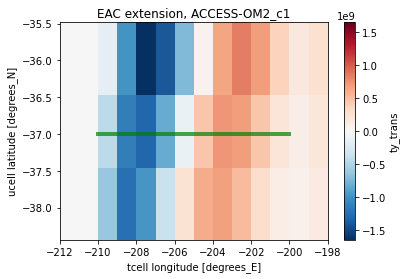

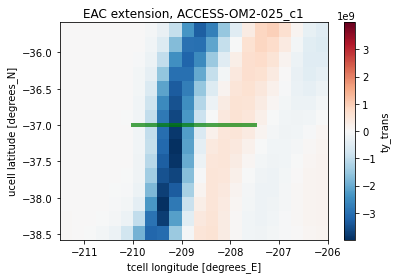

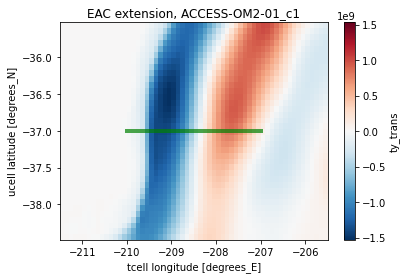

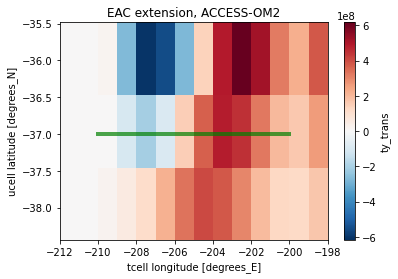

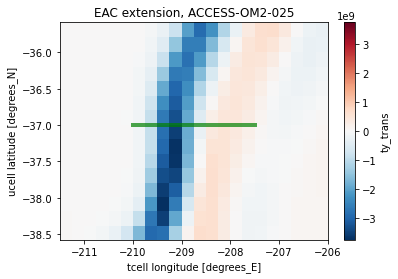

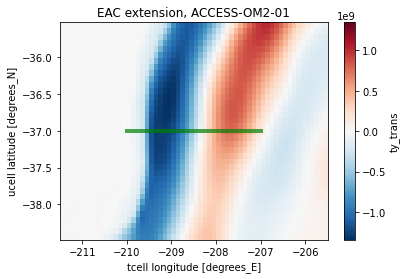

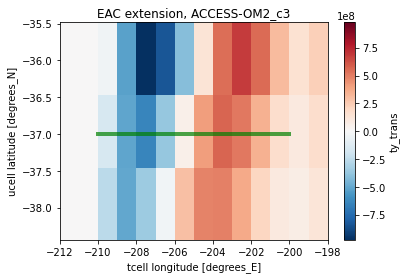

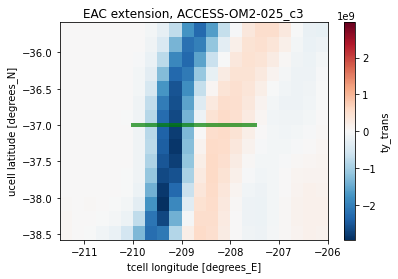

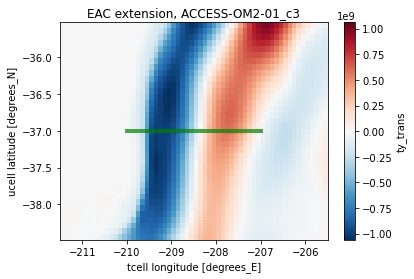

In [23]:
# plot maps of transect locations (just final time shown), 0-2000m              isel(time=-1)
m = 1.5 # margin (degrees)
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        print(strait)
        fig, ax = plt.subplots(nrows=1, ncols=1)
        ax.set_facecolor('gray')  # gray land points
        if xmin == xmax:
            e['tx_trans_int_2000'].mean('time')\
                                .sel(xu_ocean=slice(xmin-m, xmax+m))\
                                .sel(yt_ocean=slice(ymin-m, ymax+m))\
                                .plot()

        elif ymin == ymax:
            e['ty_trans_int_2000'].mean('time')\
                                .sel(xt_ocean=slice(xmin-m, xmax+m))\
                                .sel(yu_ocean=slice(ymin-m, ymax+m))\
                                .plot()
        else:
            raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
        plt.plot([xmin, xmax], [ymin, ymax],
                color='green', linewidth=4, alpha=0.7)
        plt.title(strait+', '+e['desc'])

1deg_c1
EAC extension


2022-04-30 03:26:18,014 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-04-30 03:26:18,087 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2022-04-30 03:26:18,764 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2022-04-30 03:26:24,100 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


025deg_c1
EAC extension
01deg_c1
EAC extension


2022-04-30 03:27:43,760 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2022-04-30 03:27:47,144 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2022-04-30 03:27:48,501 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2022-04-30 03:27:57,293 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


1deg_c2
EAC extension


2022-04-30 03:28:00,972 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2022-04-30 03:28:09,169 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


025deg_c2
EAC extension
01deg_c2
EAC extension


2022-04-30 03:29:26,543 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-04-30 03:29:29,489 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1deg_c3
EAC extension


2022-04-30 03:29:36,015 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-04-30 03:29:39,184 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-04-30 03:29:50,369 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


025deg_c3
EAC extension


2022-04-30 03:29:54,754 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-04-30 03:29:54,803 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-04-30 03:29:55,685 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


01deg_c3
EAC extension


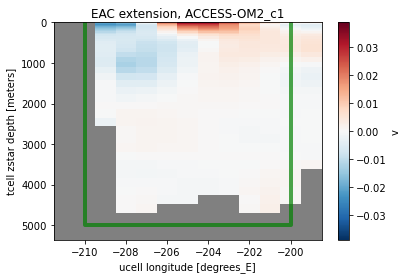

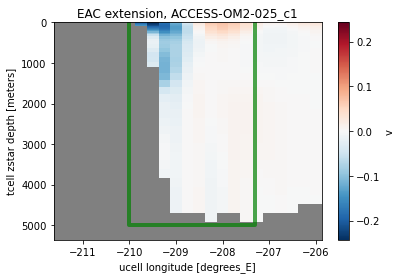

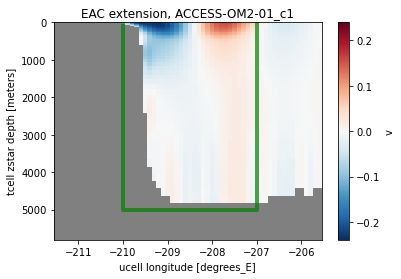

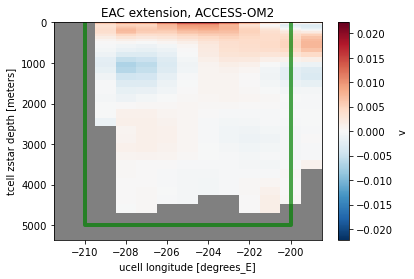

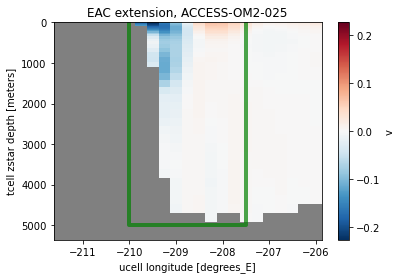

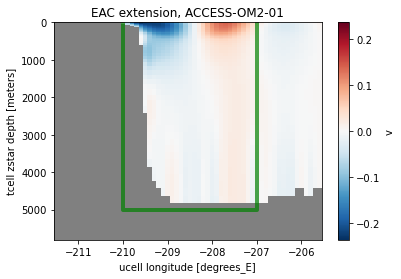

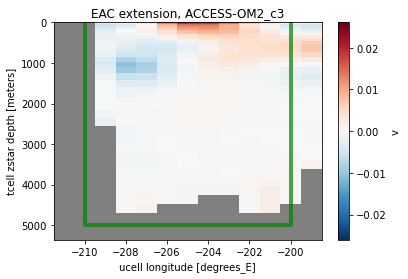

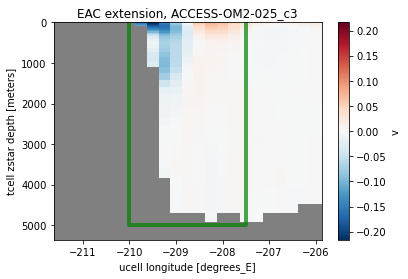

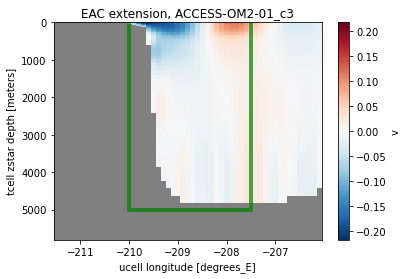

In [21]:
# plot vertical slices at transect locations
m = 1.5 # margin (degrees)
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        print(strait)
        fig, ax = plt.subplots(nrows=1, ncols=1)
        ax.set_facecolor('gray')  # gray land points
        if xmin == xmax:
            e['u'].mean('time')\
                                .sel(xu_ocean=xmin, method='nearest')\
                                .sel(yu_ocean=slice(ymin-m, ymax+m))\
                                .plot()
            plt.plot([ymin, ymin, ymax, ymax], [0, 5000, 5000, 0],
                color='green', linewidth=4, alpha=0.7)
        elif ymin == ymax:
            e['v'].mean('time')\
                                .sel(xu_ocean=slice(xmin-m, xmax+m))\
                                .sel(yu_ocean=ymin, method='nearest')\
                                .plot()
            plt.plot([xmin, xmin, xmax, xmax], [0, 5000, 5000, 0],
                color='green', linewidth=4, alpha=0.7)
        else:
            raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
        plt.title(strait+', '+e['desc'])
        plt.gca().invert_yaxis()

## Parameters


In [6]:
rho=1025 # kg/m^3

### EAC extension  transport JK

In [7]:
%%time

St = 'EAC extension'

a = []
for i, ekey in enumerate(data.keys()):
    print(ekey)
    e = data[ekey]
    
    b = []
    c = []
    
    for t in range (58,119,1):
        tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
        tend   = tstart + pd.DateOffset(years=1)
        print(str(tstart) +'-'+str(tend))
        
        c.append(str(tstart.year) +'-'+str(tend.year))
        
        
        # load data for each time interval
        
        xmin = e['straits'][St][0]
        xmax = e['straits'][St][1]
        ymin = e['straits'][St][2]
        ymax = e['straits'][St][3]

        e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                       start_time=str(tstart.year), 
                                       end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(xmin,xmax))\
                                                                                            .sel(yu_ocean=ymin, method='nearest')\
                                                                                            .mean('time')
        trans = e['ty_trans']
        trans = trans.sum('xt_ocean').sel(st_ocean=slice(0,2000)).sum('st_ocean').values
        Trans = trans/rho/1e6
        Transport = np.around(Trans,2)
        b.append(Transport)
        
                
    a.append(b)
    
test=pd.DataFrame({'1deg_c1':a[0],'025deg_c1':a[1],'01deg_c1':a[2],
                   '1deg_c2':a[3],'025deg_c2':a[4],'01deg_c2':a[5],
                   '1deg_c3':a[6],'025deg_c3':a[7],'01deg_c3':a[8]})

test.index = c

print(test)

test.to_csv(str(St) + '_trans(1).csv')

1deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

2022-04-30 11:34:59,203 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


1986-01-01 00:00:00-1987-01-01 00:00:00


2022-04-30 11:35:00,420 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


1987-01-01 00:00:00-1988-01-01 00:00:00


2022-04-30 11:35:01,857 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1988-01-01 00:00:00-1989-01-01 00:00:00


2022-04-30 11:35:03,157 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00


2022-04-30 11:35:04,802 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1991-01-01 00:00:00-1992-01-01 00:00:00


2022-04-30 11:35:06,173 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1992-01-01 00:00:00-1993-01-01 00:00:00


2022-04-30 11:35:07,350 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1993-01-01 00:00:00-1994-01-01 00:00:00


2022-04-30 11:35:08,556 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


1994-01-01 00:00:00-1995-01-01 00:00:00


2022-04-30 11:35:09,979 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


1995-01-01 00:00:00-1996-01-01 00:00:00


2022-04-30 11:35:11,116 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)


1996-01-01 00:00:00-1997-01-01 00:00:00


2022-04-30 11:35:12,693 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)


1997-01-01 00:00:00-1998-01-01 00:00:00


2022-04-30 11:35:13,809 - distributed.utils_perf - WARNING - full garbage collections took 39% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00


2022-04-30 11:35:15,015 - distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00


2022-04-30 11:35:16,599 - distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00


2022-04-30 11:35:17,880 - distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)


2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00


2022-04-30 11:35:19,702 - distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00


2022-04-30 11:35:20,808 - distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00


2022-04-30 11:35:21,955 - distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00


2022-04-30 11:35:23,114 - distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00


2022-04-30 11:35:24,292 - distributed.utils_perf - WARNING - full garbage collections took 43% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00


2022-04-30 11:35:25,467 - distributed.utils_perf - WARNING - full garbage collections took 43% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00


2022-04-30 11:35:26,681 - distributed.utils_perf - WARNING - full garbage collections took 43% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00


2022-04-30 11:35:27,793 - distributed.utils_perf - WARNING - full garbage collections took 43% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00


2022-04-30 11:35:29,153 - distributed.utils_perf - WARNING - full garbage collections took 43% CPU time recently (threshold: 10%)


2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00


2022-04-30 11:35:30,990 - distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)


2013-01-01 00:00:00-2014-01-01 00:00:00


2022-04-30 11:35:32,151 - distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00


2022-04-30 11:35:32,990 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2022-04-30 11:35:33,333 - distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)


2015-01-01 00:00:00-2016-01-01 00:00:00


2022-04-30 11:35:34,518 - distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00


2022-04-30 11:35:35,688 - distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00


2022-04-30 11:35:36,965 - distributed.utils_perf - WARNING - full garbage collections took 43% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00


2022-04-30 11:35:38,030 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2022-04-30 11:35:38,638 - distributed.utils_perf - WARNING - full garbage collections took 43% CPU time recently (threshold: 10%)


1deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

2022-04-30 11:36:06,379 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00


2022-04-30 11:36:25,680 - distributed.utils_perf - WARNING - full garbage collections took 43% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
025deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00


2022-04-30 11:36:37,800 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00


2022-04-30 11:36:43,131 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)


1967-01-01 00:00:00-1968-01-01 00:00:00


2022-04-30 11:36:44,374 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00


2022-04-30 11:36:47,393 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)


1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00


2022-04-30 11:36:52,054 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00


2022-04-30 11:36:57,092 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00


2022-04-30 11:37:01,734 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00


2022-04-30 11:37:03,536 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00


2022-04-30 11:37:05,697 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00


2022-04-30 11:37:10,180 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00


2022-04-30 11:37:14,850 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00


2022-04-30 11:37:18,392 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00


2022-04-30 11:37:23,319 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00


2022-04-30 11:37:28,229 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00


2022-04-30 11:37:29,980 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00


2022-04-30 11:37:33,094 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


01deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00


2022-04-30 11:37:35,184 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1960-01-01 00:00:00-1961-01-01 00:00:00


2022-04-30 11:37:36,309 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00


2022-04-30 11:37:38,292 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1963-01-01 00:00:00-1964-01-01 00:00:00


2022-04-30 11:37:39,139 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2022-04-30 11:37:39,591 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1964-01-01 00:00:00-1965-01-01 00:00:00


2022-04-30 11:37:41,019 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00


2022-04-30 11:37:42,980 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1967-01-01 00:00:00-1968-01-01 00:00:00


2022-04-30 11:37:44,425 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00


2022-04-30 11:37:46,486 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00


2022-04-30 11:37:47,631 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00


2022-04-30 11:37:49,669 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1973-01-01 00:00:00-1974-01-01 00:00:00


2022-04-30 11:37:50,945 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1974-01-01 00:00:00-1975-01-01 00:00:00


2022-04-30 11:37:52,576 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00


2022-04-30 11:37:54,574 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1977-01-01 00:00:00-1978-01-01 00:00:00


2022-04-30 11:37:55,886 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00


2022-04-30 11:37:57,793 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1980-01-01 00:00:00-1981-01-01 00:00:00


2022-04-30 11:37:59,076 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1981-01-01 00:00:00-1982-01-01 00:00:00


2022-04-30 11:38:00,534 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00


2022-04-30 11:38:02,430 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1984-01-01 00:00:00-1985-01-01 00:00:00


2022-04-30 11:38:03,769 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00


2022-04-30 11:38:05,589 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1987-01-01 00:00:00-1988-01-01 00:00:00


2022-04-30 11:38:06,955 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1988-01-01 00:00:00-1989-01-01 00:00:00


2022-04-30 11:38:08,417 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00


2022-04-30 11:38:10,458 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1991-01-01 00:00:00-1992-01-01 00:00:00


2022-04-30 11:38:11,593 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1992-01-01 00:00:00-1993-01-01 00:00:00


2022-04-30 11:38:12,434 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1993-01-01 00:00:00-1994-01-01 00:00:00


2022-04-30 11:38:13,730 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


1994-01-01 00:00:00-1995-01-01 00:00:00


2022-04-30 11:38:14,966 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


1995-01-01 00:00:00-1996-01-01 00:00:00


2022-04-30 11:38:15,785 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-04-30 11:38:16,434 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00


2022-04-30 11:38:18,715 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00


2022-04-30 11:38:20,203 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00


2022-04-30 11:38:20,898 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00


2022-04-30 11:38:22,265 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)


2001-01-01 00:00:00-2002-01-01 00:00:00


2022-04-30 11:38:23,598 - distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)


2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00


2022-04-30 11:38:25,348 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2022-04-30 11:38:25,778 - distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00


2022-04-30 11:38:26,645 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2022-04-30 11:38:27,116 - distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00


2022-04-30 11:38:28,487 - distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00


2022-04-30 11:38:30,027 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2022-04-30 11:38:30,475 - distributed.utils_perf - WARNING - full garbage collections took 39% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00


2022-04-30 11:38:31,651 - distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00


2022-04-30 11:38:33,792 - distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)


2011-01-01 00:00:00-2012-01-01 00:00:00


2022-04-30 11:38:34,680 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2022-04-30 11:38:35,162 - distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00


2022-04-30 11:38:36,481 - distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)


2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00


2022-04-30 11:38:38,407 - distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)


2015-01-01 00:00:00-2016-01-01 00:00:00


2022-04-30 11:38:39,258 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-04-30 11:38:39,291 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2022-04-30 11:38:39,909 - distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00


2022-04-30 11:38:41,932 - distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00


2022-04-30 11:38:43,260 - distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)


1deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00


2022-04-30 11:38:58,896 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00


2022-04-30 11:39:39,932 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)


1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00


2022-04-30 11:39:41,967 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00


2022-04-30 11:39:44,915 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)


1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00


2022-04-30 11:39:51,302 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00


2022-04-30 11:39:57,195 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2022-04-30 11:39:57,635 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)


1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00


2022-04-30 11:40:03,376 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)


1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00


2022-04-30 11:40:09,209 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)


1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00


2022-04-30 11:40:13,251 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00


2022-04-30 11:40:15,671 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)


1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00


2022-04-30 11:40:22,009 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00


2022-04-30 11:40:27,645 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00


2022-04-30 11:40:29,222 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00


2022-04-30 11:40:33,501 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00


2022-04-30 11:40:39,604 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


01deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00


2022-04-30 11:40:42,376 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-04-30 11:40:42,856 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00


2022-04-30 11:40:45,907 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00


2022-04-30 11:40:47,803 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00


2022-04-30 11:40:51,131 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00


2022-04-30 11:40:53,088 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00


2022-04-30 11:40:55,472 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-04-30 11:40:55,960 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1969-01-01 00:00:00-1970-01-01 00:00:00


2022-04-30 11:40:58,052 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00


2022-04-30 11:41:00,607 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00


2022-04-30 11:41:02,956 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00


2022-04-30 11:41:05,387 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2022-04-30 11:41:05,920 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1976-01-01 00:00:00-1977-01-01 00:00:00


2022-04-30 11:41:07,667 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00


2022-04-30 11:41:10,070 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00


2022-04-30 11:41:13,018 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1981-01-01 00:00:00-1982-01-01 00:00:00


2022-04-30 11:41:14,669 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00


2022-04-30 11:41:17,415 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1984-01-01 00:00:00-1985-01-01 00:00:00


2022-04-30 11:41:18,609 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1985-01-01 00:00:00-1986-01-01 00:00:00


2022-04-30 11:41:19,877 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00


2022-04-30 11:41:22,288 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1988-01-01 00:00:00-1989-01-01 00:00:00


2022-04-30 11:41:24,141 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00


2022-04-30 11:41:26,513 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-04-30 11:41:27,056 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00


2022-04-30 11:41:29,703 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00


2022-04-30 11:41:31,751 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1995-01-01 00:00:00-1996-01-01 00:00:00


2022-04-30 11:41:33,563 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00


2022-04-30 11:41:36,294 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00


2022-04-30 11:41:38,749 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00


2022-04-30 11:41:40,052 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2001-01-01 00:00:00-2002-01-01 00:00:00


2022-04-30 11:41:41,765 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


2002-01-01 00:00:00-2003-01-01 00:00:00


2022-04-30 11:41:43,564 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00


2022-04-30 11:41:45,776 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00


2022-04-30 11:41:48,189 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00


2022-04-30 11:41:49,291 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00


2022-04-30 11:41:50,679 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00


2022-04-30 11:41:52,307 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00


2022-04-30 11:41:55,335 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00


2022-04-30 11:41:57,661 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00


2022-04-30 11:41:59,596 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00


2022-04-30 11:42:02,040 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-04-30 11:42:02,612 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00


2022-04-30 11:42:05,554 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)


           1deg_c1  025deg_c1  01deg_c1  1deg_c2  025deg_c2  01deg_c2  \
1958-1959   -10.34     -11.76    -12.04     1.75     -11.89    -10.60   
1959-1960   -10.12     -16.72    -11.13     0.64     -11.65     -8.97   
1960-1961    -6.91      -9.81     -2.84     3.54      -9.19     -3.97   
1961-1962    -7.52     -10.90     -4.99     4.37     -10.38     -6.57   
1962-1963    -7.80      -9.27     -3.16     3.85      -8.69     -3.88   
...            ...        ...       ...      ...        ...       ...   
2014-2015     0.54     -13.04    -10.68    -3.78      -9.55    -14.70   
2015-2016    -0.81     -11.77    -12.73    -6.04      -9.96     -4.91   
2016-2017     0.50     -11.87     -3.69    -4.84     -11.08     -6.00   
2017-2018     2.22     -10.77     -5.47    -3.17      -9.23     -5.22   
2018-2019     3.91     -11.89     -3.47    -0.88      -8.11     -4.55   

           1deg_c3  025deg_c3  01deg_c3  
1958-1959    -1.80      -8.44     -5.05  
1959-1960    -3.48      -8.50     -9.83

In [8]:
%%time

a = []
for i, ekey in enumerate(data.keys()):
    print(ekey)
    e = data[ekey]
    
    b = []
    c = []
    
    for t in range (58,119,1):
        tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
        tend   = tstart + pd.DateOffset(years=1)
        print(str(tstart) +'-'+str(tend))
        
        c.append(str(tstart.year) +'-'+str(tend.year))
        
        
        # load data for each time interval
        
        if i%3 == 0:
            
            e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                               start_time=str(tstart.year), 
                                               end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(-210,-205))\
                                                                                                    .sel(yu_ocean = slice(-39,-35))\
                                                                                                    .mean('time')
        else:
            
            e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                               start_time=str(tstart.year), 
                                               end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(-210,-208.5))\
                                                                                                    .sel(yu_ocean = slice(-39,-35))\
                                                                                                    .mean('time')

        trans = e['ty_trans'].where(e['ty_trans']<0, 0)  


        
#         # plot maps of transect locations (just final time shown), full depth
#         m = 7.5 # margin (degrees)
        
#         for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
#             print(strait)
#             fig, ax = plt.subplots(nrows=1, ncols=1)
#             ax.set_facecolor('gray')  # gray land points

#             trans.sel(xt_ocean=slice(xmin-m, xmax+m))\
#                          .sel(yu_ocean=slice(ymin-m, ymax+m))\
#                          .sum('st_ocean')\
#                          .plot()

#             plt.plot([xmin, xmax], [ymin, ymax],
#                     color='green', linewidth=4, alpha=0.7)
#             plt.title(strait+', '+e['desc'])
            
        trans = trans.sum('xt_ocean').sel(st_ocean=slice(0,2000)).sum('st_ocean')
        Trans = trans/rho/1e6
        transport = Trans.sel(yu_ocean = -37, method='nearest').values
        Transport = np.around(transport,2)
        b.append(Transport)
        
    a.append(b)
    
test=pd.DataFrame({'1deg_c1':a[0],'025deg_c1':a[1],'01deg_c1':a[2],
                   '1deg_c2':a[3],'025deg_c2':a[4],'01deg_c2':a[5],
                   '1deg_c3':a[6],'025deg_c3':a[7],'01deg_c3':a[8]})

test.index = c

print(test)

test.to_csv('eAC extension(1).csv')

1deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

2022-04-30 11:42:22,999 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00


2022-04-30 11:42:43,221 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00


2022-04-30 11:42:48,430 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00


2022-04-30 11:42:53,010 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)


1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00


2022-04-30 11:42:57,682 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)


1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00


2022-04-30 11:43:02,561 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)


1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00


2022-04-30 11:43:07,505 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00


2022-04-30 11:43:12,744 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00


2022-04-30 11:43:18,477 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)


2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
01deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00


2022-04-30 11:43:23,102 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)


1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00


2022-04-30 11:43:25,545 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)


1961-01-01 00:00:00-1962-01-01 00:00:00


2022-04-30 11:43:27,105 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00


2022-04-30 11:43:29,617 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)


1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00


2022-04-30 11:43:32,302 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)


1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00


2022-04-30 11:43:34,338 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)


1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00


2022-04-30 11:43:36,790 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00


2022-04-30 11:43:39,793 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)


1972-01-01 00:00:00-1973-01-01 00:00:00


2022-04-30 11:43:41,039 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-04-30 11:43:41,633 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)


1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00


2022-04-30 11:43:44,361 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)


1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00


2022-04-30 11:43:46,638 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)


1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00


2022-04-30 11:43:48,948 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)


1979-01-01 00:00:00-1980-01-01 00:00:00


2022-04-30 11:43:50,447 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)


1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00


2022-04-30 11:43:52,821 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-04-30 11:43:53,436 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)


1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00


2022-04-30 11:43:56,577 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)


1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00


2022-04-30 11:43:58,897 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)


1986-01-01 00:00:00-1987-01-01 00:00:00


2022-04-30 11:44:00,471 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)


1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00


2022-04-30 11:44:02,274 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-04-30 11:44:02,910 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00


2022-04-30 11:44:05,178 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00


2022-04-30 11:44:07,566 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00


2022-04-30 11:44:09,951 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-04-30 11:44:10,487 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


1995-01-01 00:00:00-1996-01-01 00:00:00


2022-04-30 11:44:12,204 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00


2022-04-30 11:44:14,728 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00


2022-04-30 11:44:17,163 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-04-30 11:44:17,728 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00


2022-04-30 11:44:20,220 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


2002-01-01 00:00:00-2003-01-01 00:00:00


2022-04-30 11:44:21,940 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00


2022-04-30 11:44:24,449 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00


2022-04-30 11:44:27,646 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00


2022-04-30 11:44:28,875 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00


2022-04-30 11:44:30,505 - distributed.utils_perf - WARNING - full garbage collections took 38% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00


2022-04-30 11:44:33,412 - distributed.utils_perf - WARNING - full garbage collections took 38% CPU time recently (threshold: 10%)


2011-01-01 00:00:00-2012-01-01 00:00:00


2022-04-30 11:44:35,211 - distributed.utils_perf - WARNING - full garbage collections took 39% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00


2022-04-30 11:44:37,807 - distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00


2022-04-30 11:44:40,829 - distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00


2022-04-30 11:44:42,004 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00


2022-04-30 11:44:43,537 - distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00


2022-04-30 11:44:45,133 - distributed.utils_perf - WARNING - full garbage collections took 41% CPU time recently (threshold: 10%)


1deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

2022-04-30 11:45:19,945 - distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)


1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00


2022-04-30 11:45:24,662 - distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)


1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00


2022-04-30 11:45:30,363 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)


1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00


2022-04-30 11:45:35,146 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)


1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00


2022-04-30 11:45:40,975 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00


2022-04-30 11:45:45,773 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00


2022-04-30 11:45:51,163 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00


2022-04-30 11:45:56,011 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00


2022-04-30 11:46:01,025 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00
01deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00


2022-04-30 11:46:04,563 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00


2022-04-30 11:46:07,352 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00


2022-04-30 11:46:10,044 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


1964-01-01 00:00:00-1965-01-01 00:00:00


2022-04-30 11:46:12,237 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00


2022-04-30 11:46:14,350 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00


2022-04-30 11:46:16,964 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00


2022-04-30 11:46:19,634 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00


2022-04-30 11:46:22,181 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1973-01-01 00:00:00-1974-01-01 00:00:00


2022-04-30 11:46:23,558 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00


2022-04-30 11:46:26,644 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00


2022-04-30 11:46:29,150 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00


2022-04-30 11:46:32,095 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1980-01-01 00:00:00-1981-01-01 00:00:00


2022-04-30 11:46:34,348 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00


2022-04-30 11:46:36,526 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00


2022-04-30 11:46:38,860 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00


2022-04-30 11:46:41,267 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00


2022-04-30 11:46:43,677 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00


2022-04-30 11:46:45,642 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00


2022-04-30 11:46:48,479 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00


2022-04-30 11:46:50,941 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00


2022-04-30 11:46:54,226 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00


2022-04-30 11:46:56,832 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00


2022-04-30 11:46:58,854 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00


2022-04-30 11:47:01,508 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00


2022-04-30 11:47:04,417 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00


2022-04-30 11:47:06,483 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00


2022-04-30 11:47:08,828 - distributed.utils_perf - WARNING - full garbage collections took 38% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00


2022-04-30 11:47:11,943 - distributed.utils_perf - WARNING - full garbage collections took 39% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00


2022-04-30 11:47:14,760 - distributed.utils_perf - WARNING - full garbage collections took 40% CPU time recently (threshold: 10%)


2011-01-01 00:00:00-2012-01-01 00:00:00


2022-04-30 11:47:16,594 - distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00


2022-04-30 11:47:19,862 - distributed.utils_perf - WARNING - full garbage collections took 42% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00


2022-04-30 11:47:22,451 - distributed.utils_perf - WARNING - full garbage collections took 43% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00


2022-04-30 11:47:24,928 - distributed.utils_perf - WARNING - full garbage collections took 44% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00


2022-04-30 11:47:26,894 - distributed.utils_perf - WARNING - full garbage collections took 44% CPU time recently (threshold: 10%)


1deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

2022-04-30 11:48:01,786 - distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)


1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00


2022-04-30 11:48:07,207 - distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)


1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00


2022-04-30 11:48:11,712 - distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)


1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00


2022-04-30 11:48:18,384 - distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)


1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00


2022-04-30 11:48:23,221 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)


1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00


2022-04-30 11:48:28,600 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)


1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00


2022-04-30 11:48:33,358 - distributed.utils_perf - WARNING - full garbage collections took 34% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00


2022-04-30 11:48:39,092 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
01deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00


2022-04-30 11:48:44,920 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00


2022-04-30 11:48:47,446 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1961-01-01 00:00:00-1962-01-01 00:00:00


2022-04-30 11:48:49,385 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00


2022-04-30 11:48:51,656 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00


2022-04-30 11:48:54,210 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00


2022-04-30 11:48:55,928 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00


2022-04-30 11:48:58,386 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00


2022-04-30 11:49:00,002 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1971-01-01 00:00:00-1972-01-01 00:00:00


2022-04-30 11:49:00,817 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1972-01-01 00:00:00-1973-01-01 00:00:00


2022-04-30 11:49:02,451 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00


2022-04-30 11:49:04,134 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00


2022-04-30 11:49:06,921 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1977-01-01 00:00:00-1978-01-01 00:00:00


2022-04-30 11:49:07,931 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1978-01-01 00:00:00-1979-01-01 00:00:00


2022-04-30 11:49:09,809 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00


2022-04-30 11:49:12,358 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00


2022-04-30 11:49:15,016 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1983-01-01 00:00:00-1984-01-01 00:00:00


2022-04-30 11:49:16,152 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-04-30 11:49:16,836 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00


2022-04-30 11:49:19,120 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00


2022-04-30 11:49:21,999 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00


2022-04-30 11:49:24,306 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-04-30 11:49:24,897 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00


2022-04-30 11:49:26,946 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


1992-01-01 00:00:00-1993-01-01 00:00:00


2022-04-30 11:49:28,809 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00


2022-04-30 11:49:31,613 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


1995-01-01 00:00:00-1996-01-01 00:00:00


2022-04-30 11:49:32,349 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1996-01-01 00:00:00-1997-01-01 00:00:00


2022-04-30 11:49:33,666 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)


1997-01-01 00:00:00-1998-01-01 00:00:00


2022-04-30 11:49:34,525 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00


2022-04-30 11:49:36,139 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00


2022-04-30 11:49:38,330 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00


2022-04-30 11:49:39,837 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2022-04-30 11:49:40,439 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00


2022-04-30 11:49:42,633 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00


2022-04-30 11:49:43,660 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-04-30 11:49:44,520 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00


2022-04-30 11:49:47,404 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00


2022-04-30 11:49:48,244 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00


2022-04-30 11:49:50,025 - distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00


2022-04-30 11:49:52,246 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00


2022-04-30 11:49:55,419 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00


2022-04-30 11:49:56,563 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2015-01-01 00:00:00-2016-01-01 00:00:00


2022-04-30 11:49:57,572 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-04-30 11:49:58,219 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00


2022-04-30 11:50:00,812 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00
           1deg_c1  025deg_c1   01deg_c1  1deg_c2  025deg_c2   01deg_c2  \
1958-1959   -15.66     -13.33 -28.440001    -1.06     -12.59 -24.520000   
1959-1960   -16.17     -18.73 -25.139999    -2.27     -15.16 -17.820000   
1960-1961   -12.37     -13.42  -4.900000    -0.20     -10.37  -3.080000   
1961-1962   -12.45     -12.29  -2.570000    -0.17     -13.08 -15.340000   
1962-1963   -11.08     -11.27  -6.320000    -0.25     -11.02  -8.020000   
...            ...        ...        ...      ...        ...        ...   
2014-2015    -2.24     -17.27 -20.049999    -7.59     -11.06 -22.870001   
2015-2016    -2.70     -16.27 -15.230000    -8.62     -11.91 -17.680000   
2016-2017    -2.41     -13.96  -4.670000    -8.92     -12.31  -9.160000   
2017-2018    -0.47     -12.99 -16.730000    -6.28     -10.16 -16.620001   
2018-2019    -0.17     -12.24  -7.630000    -4.88      -8.47 -14.530000   

           1deg_c3  025deg_c3   01deg_c3  
1958-1959    -5.

### Tasman Front eastward transport

In [12]:
%%time

a = []
for i, ekey in enumerate(data.keys()):
    print(ekey)
    e = data[ekey]
    
    b = []
    c = []
    
    for t in range (58,119,1):
        tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
        tend   = tstart + pd.DateOffset(years=1)
        print(str(tstart) +'-'+str(tend))
        
        c.append(str(tstart.year) +'-'+str(tend.year))
        
        
        # load data for each time interval
        
        if i%3 == 0:
            e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                               start_time=str(tstart.year), 
                                               end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xu_ocean = slice(-189,-185))\
                                                                                                    .sel(yt_ocean = slice(-34.4,-28))\
                                                                                                    .mean('time')

        else:
            e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                   start_time=str(tstart.year), 
                                   end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xu_ocean = slice(-189,-185))\
                                                                                        .sel(yt_ocean = slice(-34.4,-32))\
                                                                                        .mean('time')
        trans = e['tx_trans'].where(e['tx_trans']>0, 0)  


        
#         # plot maps of transect locations (just final time shown), full depth
#         m = 7.5 # margin (degrees)
        
#         for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
#             print(strait)
#             fig, ax = plt.subplots(nrows=1, ncols=1)
#             ax.set_facecolor('gray')  # gray land points

#             trans.sel(xt_ocean=slice(xmin-m, xmax+m))\
#                          .sel(yu_ocean=slice(ymin-m, ymax+m))\
#                          .sum('st_ocean')\
#                          .plot()

#             plt.plot([xmin, xmax], [ymin, ymax],
#                     color='green', linewidth=4, alpha=0.7)
#             plt.title(strait+', '+e['desc'])
            
        trans = trans.sum('yt_ocean').sel(st_ocean=slice(0,2000)).sum('st_ocean')
        Trans = trans/rho/1e6
        transport = Trans.sel(xu_ocean = -187, method='nearest').values
        Transport = np.around(transport,2)
        b.append(Transport)
        
    a.append(b)
    
test=pd.DataFrame({'1deg_c1':a[0],'025deg_c1':a[1],'01deg_c1':a[2],
                   '1deg_c2':a[3],'025deg_c2':a[4],'01deg_c2':a[5],
                   '1deg_c3':a[6],'025deg_c3':a[7],'01deg_c3':a[8]})

test.index = c

print(test)

test.to_csv('Tasman Front(1).csv')

1deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

### EAC southward transport

In [10]:
%%time

a = []
for i, ekey in enumerate(data.keys()):
    print(ekey)
    e = data[ekey]
    
    b = []
    c = []
    
    for t in range (58,119,1):
        tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
        tend   = tstart + pd.DateOffset(years=1)
        print(str(tstart) +'-'+str(tend))
        
        c.append(str(tstart.year) +'-'+str(tend.year))
        
        
        # load data for each time interval
        
        if i%3 == 0:
            
            e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                               start_time=str(tstart.year), 
                                               end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(-208,-201))\
                                                                                                    .sel(yu_ocean = slice(-33,-25))\
                                                                                                    .mean('time')
        else:
            
            e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                               start_time=str(tstart.year), 
                                               end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(-208,-205))\
                                                                                                    .sel(yu_ocean = slice(-33,-25))\
                                                                                                    .mean('time')

        trans = e['ty_trans'].where(e['ty_trans']<0, 0)  
            
        trans = trans.sum('xt_ocean').sel(st_ocean=slice(0,2000)).sum('st_ocean')
        Trans = trans/rho/1e6
        transport = Trans.sel(yu_ocean = -27, method='nearest').values
        Transport = np.around(transport,2)
        b.append(Transport)
        
    a.append(b)
    
test=pd.DataFrame({'1deg_c1':a[0],'025deg_c1':a[1],'01deg_c1':a[2],
                   '1deg_c2':a[3],'025deg_c2':a[4],'01deg_c2':a[5],
                   '1deg_c3':a[6],'025deg_c3':a[7],'01deg_c3':a[8]})

test.index = c

print(test)

test.to_csv('EAC_trans(1).csv')

1deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00


KeyboardInterrupt: 

2022-04-14 12:10:41,666 - distributed.nanny - WARNING - Restarting worker
2022-04-14 12:10:41,667 - distributed.nanny - WARNING - Restarting worker
2022-04-14 12:10:41,696 - distributed.nanny - WARNING - Restarting worker
2022-04-14 12:10:41,701 - distributed.nanny - WARNING - Restarting worker
2022-04-14 12:10:41,734 - distributed.nanny - WARNING - Restarting worker
2022-04-14 12:10:43,738 - distributed.nanny - WARNING - Restarting worker
2022-04-14 12:10:43,757 - distributed.nanny - WARNING - Restarting worker
2022-04-14 12:10:44,184 - distributed.nanny - WARNING - Restarting worker


### Strait trans

In [7]:
%%time

St = 'FE'

a = []
for i, ekey in enumerate(data.keys()):
    print(ekey)
    e = data[ekey]
    
    b = []
    c = []
    
    for t in range (58,119,1):
        tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
        tend   = tstart + pd.DateOffset(years=1)
        print(str(tstart) +'-'+str(tend))
        
        c.append(str(tstart.year) +'-'+str(tend.year))
        
        
        # load data for each time interval
        
        xmin = e['straits'][St][0]
        xmax = e['straits'][St][1]
        ymin = e['straits'][St][2]
        ymax = e['straits'][St][3]

        e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                       start_time=str(tstart.year), 
                                       end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(xmin,xmax))\
                                                                                            .sel(yu_ocean=ymin, method='nearest')\
                                                                                            .mean('time')
        trans = e['ty_trans']
        # trans = trans.sum('xt_ocean').sel(st_ocean=slice(0,2000)).sum('st_ocean').values
        trans = trans.sum('xt_ocean').sum('st_ocean').values
        Trans = trans/rho/1e6
        Transport = np.around(Trans,2)
        b.append(Transport)
        
                
    a.append(b)
    
test=pd.DataFrame({'1deg_c1':a[0],'025deg_c1':a[1],'01deg_c1':a[2],
                   '1deg_c2':a[3],'025deg_c2':a[4],'01deg_c2':a[5],
                   '1deg_c3':a[6],'025deg_c3':a[7],'01deg_c3':a[8]})

test.index = c

print(test)

# test.to_csv(str(St) + '_trans(1).csv')
test.to_csv(str(St) + '_trans_full depth(1).csv')

1deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


1deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
025deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00
01deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1963-01-01 00:00:00-1964-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1964-01-01 00:00:00-1965-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1965-01-01 00:00:00-1966-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1978-01-01 00:00:00-1979-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
025deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
01deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
           1deg_c1  025deg_c1  01deg_c1  1deg_c2  025deg_c2  01deg_c2  \
1958-1959   -20.82     -19.49    -18.91   -27.02     -21.56    -18.78   
1959-1960   -24.40     -22.40    -19.76   -26.68     -23.87    -19.98   
1960-1961   -23.73     -21.01    -18.47   -24.82     -21.11    -16.77   
1961-1962   -24.99     -19.80    -18.20   -25.61     -22.35    -17.20   
1962-1963   -21.86     -17.36    -14.28   -22.65     -16.83    -14.65   
...            ...        ...       ...      ...        ...       ...   
2014-2015   -26.12     -22.50    -18.25   -23.30     -20.12    -16.67   
2015-2016   -27.39     -25.39    -21.01   -25.07     -23.25    -21.07   
2016-2017   -26.20     -21.81    -18.77   -24.88     -20.11    -17.78   
2017-2018   -25.09     -22.08    -17.36   -24.36     -19.87    -15.42   
2018-2019   -24.34     -20.25    -15.68   -22.38     -19.57    -16.45   

           1deg_c3  025deg_c3  01deg_c3  
1

In [7]:
%%time

St = 'AB'

a = []
for i, ekey in enumerate(data.keys()):
    print(ekey)
    e = data[ekey]
    
    b = []
    c = []
    
    for t in range (58,119,1):
        tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
        tend   = tstart + pd.DateOffset(years=1)
        print(str(tstart) +'-'+str(tend))
        
        c.append(str(tstart.year) +'-'+str(tend.year))
        
        
        # load data for each time interval
        
        xmin = e['straits'][St][0]
        xmax = e['straits'][St][1]
        ymin = e['straits'][St][2]
        ymax = e['straits'][St][3]

        e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                       start_time=str(tstart.year), 
                                       end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(xmin,xmax))\
                                                                                            .sel(yu_ocean=ymin, method='nearest')\
                                                                                            .mean('time')
        trans = e['ty_trans']
        # trans = trans.sum('xt_ocean').sel(st_ocean=slice(0,2000)).sum('st_ocean').values
        trans = trans.sum('xt_ocean').sum('st_ocean').values
        Trans = trans/rho/1e6
        Transport = np.around(Trans,2)
        b.append(Transport)
        
                
    a.append(b)
    
test=pd.DataFrame({'1deg_c1':a[0],'025deg_c1':a[1],'01deg_c1':a[2],
                   '1deg_c2':a[3],'025deg_c2':a[4],'01deg_c2':a[5],
                   '1deg_c3':a[6],'025deg_c3':a[7],'01deg_c3':a[8]})

test.index = c

print(test)

# test.to_csv(str(St) + '_trans(1).csv')
test.to_csv(str(St) + '_trans_full depth(1).csv')

1deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


1deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
025deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
01deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1990-01-01 00:00:00-1991-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
025deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01

distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
01deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
           1deg_c1  025deg_c1  01deg_c1  1deg_c2  025deg_c2  01deg_c2  \
1958-1959   -10.76     -11.41    -11.21    -0.02     -12.51    -11.87   
1959-1960   -12.11     -13.81     -9.35     0.25     -13.61    -10.31   
1960-1961   -10.96     -12.51    -11.60     2.69     -11.06     -8.18   
1961-1962   -12.55     -14.06    -11.70     1.50     -13.65     -9.52   
1962-1963   -12.80     -15.05    -11.54     0.68     -12.74    -13.48   
...            ...        ...       ...      ...        ...       ...   
2014-2015    -0.01     -13.33     -8.95    -6.61     -10.17    -10.73   
2015-2016    -0.67     -13.98    -10.61    -7.73     -12.11    -13.81   
2016-2017     0.15     -16.20    -15.43    -7.52     -11.98    -11.31   
2017-2018     1.25     -15.70    -13.69    -6.88     -11.95    -12.17   
2018-2019     0.45     -15.04    -14.77    -6.96     -11.30    -13.75   

           1deg_c3  025deg_c3  01deg_c3  
1

In [8]:
%%time

St = 'BC'

a = []
for i, ekey in enumerate(data.keys()):
    print(ekey)
    e = data[ekey]
    
    b = []
    c = []
    
    for t in range (58,119,1):
        tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
        tend   = tstart + pd.DateOffset(years=1)
        print(str(tstart) +'-'+str(tend))
        
        c.append(str(tstart.year) +'-'+str(tend.year))
        
        
        # load data for each time interval
        
        xmin = e['straits'][St][0]
        xmax = e['straits'][St][1]
        ymin = e['straits'][St][2]
        ymax = e['straits'][St][3]

        e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                       start_time=str(tstart.year), 
                                       end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(xmin,xmax))\
                                                                                            .sel(yu_ocean=ymin, method='nearest')\
                                                                                            .mean('time')
        trans = e['ty_trans']
        # trans = trans.sum('xt_ocean').sel(st_ocean=slice(0,2000)).sum('st_ocean').values
        trans = trans.sum('xt_ocean').sum('st_ocean').values
        Trans = trans/rho/1e6
        Transport = np.around(Trans,2)
        b.append(Transport)
        
                
    a.append(b)
    
test=pd.DataFrame({'1deg_c1':a[0],'025deg_c1':a[1],'01deg_c1':a[2],
                   '1deg_c2':a[3],'025deg_c2':a[4],'01deg_c2':a[5],
                   '1deg_c3':a[6],'025deg_c3':a[7],'01deg_c3':a[8]})

test.index = c

print(test)

# test.to_csv(str(St) + '_trans(1).csv')
test.to_csv(str(St) + '_trans_full depth(1).csv')

1deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1986-01-01 00:00:00-1987-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00
01deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


1967-01-01 00:00:00-1968-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1981-01-01 00:00:00-1982-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


1982-01-01 00:00:00-1983-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
1deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
025deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1991-01-01 00:00:00-1992-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2001-01-01 00:00:00-2002-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2011-01-01 00:00:00-2012-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2015-01-01 00:00:00-2016-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


01deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2015-01-01 00:00:00-2016-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00
1deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1995-01-01 00:00:00-1996-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2015-01-01 00:00:00-2016-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


01deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1968-01-01 00:00:00-1969-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1969-01-01 00:00:00-1970-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1994-01-01 00:00:00-1995-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00
           1deg_c1  025deg_c1  01deg_c1  1deg_c2  025deg_c2  01deg_c2  \
1958-1959     3.09       3.60      3.46     3.90       3.05      3.68   
1959-1960     3.27       2.87      1.29     2.70       5.47      2.57   
1960-1961     2.37       2.86      4.64     2.74       3.71      1.80   
1961-1962     2.82       5.01      4.45     3.24       5.35      2.76   
1962-1963     4.68       7.28      6.57     3.30       5.69      7.95   
...            ...        ...       ...      ...        ...       ...   
2014-2015     4.38       3.47      1.69     5.33       3.02      4.21   
2015-2016     3.81       1.77      1.32     4.07       2.78      3.74   
2016-2017     2.81       4.41      7.43     3.44       4.54      3.86   
2017-2018     4.16       8.95      8.97     5.74       7.09      7.61   
2018-2019     6.07       8.88      8.59     8.15       5.86      9.28   

           1deg_c3  025deg_c3  01deg_c3  
1958-1959     5.98       3.93      6.40  

In [9]:
%%time

St = 'ED'

a = []
for i, ekey in enumerate(data.keys()):
    print(ekey)
    e = data[ekey]
    
    b = []
    c = []
    
    for t in range (58,119,1):
        tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
        tend   = tstart + pd.DateOffset(years=1)
        print(str(tstart) +'-'+str(tend))
        
        c.append(str(tstart.year) +'-'+str(tend.year))
        
        
        # load data for each time interval
        
        xmin = e['straits'][St][0]
        xmax = e['straits'][St][1]
        ymin = e['straits'][St][2]
        ymax = e['straits'][St][3]

        e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                       start_time=str(tstart.year), 
                                       end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(xmin,xmax))\
                                                                                            .sel(yu_ocean=ymin, method='nearest')\
                                                                                            .mean('time')
        trans = e['ty_trans']
        # trans = trans.sum('xt_ocean').sel(st_ocean=slice(0,2000)).sum('st_ocean').values
        trans = trans.sum('xt_ocean').sum('st_ocean').values
        Trans = trans/rho/1e6
        Transport = np.around(Trans,2)
        b.append(Transport)
        
                
    a.append(b)
    
test=pd.DataFrame({'1deg_c1':a[0],'025deg_c1':a[1],'01deg_c1':a[2],
                   '1deg_c2':a[3],'025deg_c2':a[4],'01deg_c2':a[5],
                   '1deg_c3':a[6],'025deg_c3':a[7],'01deg_c3':a[8]})

test.index = c

print(test)

# test.to_csv(str(St) + '_trans(1).csv')
test.to_csv(str(St) + '_trans_full depth(1).csv')

1deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
025deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00
01deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


1964-01-01 00:00:00-1965-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1971-01-01 00:00:00-1972-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1988-01-01 00:00:00-1989-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1993-01-01 00:00:00-1994-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
1deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)


1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00
025deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1992-01-01 00:00:00-1993-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2013-01-01 00:00:00-2014-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00
01deg_c2
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1974-01-01 00:00:00-1975-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


1975-01-01 00:00:00-1976-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00
1deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 0

distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
025deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1996-01-01 00:00:00-1997-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1997-01-01 00:00:00-1998-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2011-01-01 00:00:00-2012-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)


01deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


1969-01-01 00:00:00-1970-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1983-01-01 00:00:00-1984-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)


1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2013-01-01 00:00:00-2014-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00
           1deg_c1  025deg_c1  01deg_c1  1deg_c2  025deg_c2  01deg_c2  \
1958-1959     1.39       1.75      0.69     0.08       3.84      5.78   
1959-1960     2.66       3.43      2.93    -3.69       4.64      2.51   
1960-1961     3.04       6.45      4.26    -1.44       5.51      3.61   
1961-1962     4.53       8.20      4.66     0.65       6.04      4.65   
1962-1963     2.26       3.27      1.68    -0.14      -0.27      2.66   
...            ...        ...       ...      ...        ...       ...   
2014-2015     1.37       5.35      3.69     4.43       5.39      4.23   
2015-2016    -0.30       6.02      3.85     2.01       5.97      3.41   
2016-2017    -3.24       3.31      3.04     1.38       3.93      4.33   
2017-2018    -1.24       5.33      3.93     4.21       3.97      2.01   
2018-2019    -0.43       3.63      0.77     5.30       5.12      1.04   

           1deg_c3  025deg_c3  01deg_c3  
1958-1959     2.86       4.56      3.46  

In [11]:
%%time

St = 'DG'

a = []
for i, ekey in enumerate(data.keys()):
    print(ekey)
    e = data[ekey]
    
    b = []
    c = []
    
    for t in range (58,119,1):
        tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
        tend   = tstart + pd.DateOffset(years=1)
        print(str(tstart) +'-'+str(tend))
        
        c.append(str(tstart.year) +'-'+str(tend.year))
        
        
        # load data for each time interval
        
        xmin = e['straits'][St][0]
        xmax = e['straits'][St][1]
        ymin = e['straits'][St][2]
        ymax = e['straits'][St][3]

        e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                       start_time=str(tstart.year), 
                                       end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(yt_ocean = slice(ymin,ymax))\
                                                                                            .sel(xu_ocean=xmin, method='nearest')\
                                                                                            .mean('time')

        trans = e['tx_trans']
        # trans = trans.sum('yt_ocean').sel(st_ocean=slice(0,2000)).sum('st_ocean').values
        trans = trans.sum('yt_ocean').sum('st_ocean').values
        Trans = trans/rho/1e6
        Transport = np.around(Trans,2)
        b.append(Transport)
                

                
    a.append(b)
    
test=pd.DataFrame({'1deg_c1':a[0],'025deg_c1':a[1],'01deg_c1':a[2],
                   '1deg_c2':a[3],'025deg_c2':a[4],'01deg_c2':a[5],
                   '1deg_c3':a[6],'025deg_c3':a[7],'01deg_c3':a[8]})

test.index = c

print(test)

# test.to_csv(str(St) + '_trans(1).csv')
test.to_csv(str(St) + '_trans_full depth(1).csv')

1deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2004-01-01 00:00:00-2005-01-01 00:00:00
2005-01-01 00:00:00-2006-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00
1deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00
1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00
1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00
1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00
1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1995-01-01 00:00:00-1996-01-01 00:00:00
1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00
2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00
2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00
2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00
2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


2014-01-01 00:00:00-2015-01-01 00:00:00
2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00
2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
01deg_c3
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 00:00:00
1983-01-01 00:00:00-1984-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


1984-01-01 00:00:00-1985-01-01 00:00:00
1985-01-01 00:00:00-1986-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1986-01-01 00:00:00-1987-01-01 00:00:00
1987-01-01 00:00:00-1988-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1988-01-01 00:00:00-1989-01-01 00:00:00
1989-01-01 00:00:00-1990-01-01 00:00:00
1990-01-01 00:00:00-1991-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1991-01-01 00:00:00-1992-01-01 00:00:00
1992-01-01 00:00:00-1993-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1993-01-01 00:00:00-1994-01-01 00:00:00
1994-01-01 00:00:00-1995-01-01 00:00:00
1995-01-01 00:00:00-1996-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1996-01-01 00:00:00-1997-01-01 00:00:00
1997-01-01 00:00:00-1998-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


1998-01-01 00:00:00-1999-01-01 00:00:00
1999-01-01 00:00:00-2000-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2000-01-01 00:00:00-2001-01-01 00:00:00
2001-01-01 00:00:00-2002-01-01 00:00:00
2002-01-01 00:00:00-2003-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2003-01-01 00:00:00-2004-01-01 00:00:00
2004-01-01 00:00:00-2005-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2005-01-01 00:00:00-2006-01-01 00:00:00
2006-01-01 00:00:00-2007-01-01 00:00:00
2007-01-01 00:00:00-2008-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2008-01-01 00:00:00-2009-01-01 00:00:00
2009-01-01 00:00:00-2010-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2010-01-01 00:00:00-2011-01-01 00:00:00
2011-01-01 00:00:00-2012-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2012-01-01 00:00:00-2013-01-01 00:00:00
2013-01-01 00:00:00-2014-01-01 00:00:00
2014-01-01 00:00:00-2015-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2015-01-01 00:00:00-2016-01-01 00:00:00
2016-01-01 00:00:00-2017-01-01 00:00:00


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


2017-01-01 00:00:00-2018-01-01 00:00:00
2018-01-01 00:00:00-2019-01-01 00:00:00
           1deg_c1  025deg_c1  01deg_c1  1deg_c2  025deg_c2  01deg_c2  \
1958-1959    11.45       9.70     10.22    30.99       8.06      4.64   
1959-1960    12.30       7.68      8.54    33.56      10.78      9.45   
1960-1961    11.57       4.61      7.03    31.93       7.97      6.48   
1961-1962    10.10       2.21      6.05    29.84       7.68      5.48   
1962-1963    10.95       6.09      7.49    26.97       9.81      6.22   
...            ...        ...       ...      ...        ...       ...   
2014-2015    29.37       7.06      7.13    17.46       7.40      5.70   
2015-2016    30.85       6.79      7.54    19.14       7.65      7.28   
2016-2017    32.55       6.48      7.47    19.26       8.56      5.73   
2017-2018    31.87       9.75      8.50    18.83      10.84      8.65   
2018-2019    31.49      10.32      8.66    18.12       8.92     10.87   

           1deg_c3  025deg_c3  01deg_c3  
1

distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


### EAUC southward transport

In [12]:
%%time

a = []

for i, ekey in enumerate(data.keys()):
    print(ekey)
    e = data[ekey]
    
    b = []
    c = []
    
    for t in range (58,119,1):
        tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
        tend   = tstart + pd.DateOffset(years=1)
        print(str(tstart) +'-'+str(tend))
        
        c.append(str(tstart.year) +'-'+str(tend.year))
        
        
        # load data for each time interval
        
        if i%3 == 0:
            
            e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                               start_time=str(tstart.year), 
                                               end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xu_ocean = slice(-187,-185))\
                                                                                                    .sel(yt_ocean = slice(-35,-31))\
                                                                                                    .mean('time')
        
        else:
            
            e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                               start_time=str(tstart.year), 
                                               end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xu_ocean = slice(-187,-184))\
                                                                                                    .sel(yt_ocean = slice(-35,-32.5))\
                                                                                                    .mean('time')
                                                                                                         
        
        trans = e['tx_trans'].where(e['tx_trans']>0, 0) 
                                                                                                         
                                                                                                         
        trans = trans.sum('yt_ocean').sel(st_ocean=slice(0,2000)).sum('st_ocean')
        Trans = trans/rho/1e6
        transport = Trans.sel(xu_ocean = -186, method='nearest').values
        Transport = np.around(transport,2)
        b.append(Transport)
        
    a.append(b)
    
test=pd.DataFrame({'1deg_c1':a[0],'025deg_c1':a[1],'01deg_c1':a[2],
                   '1deg_c2':a[3],'025deg_c2':a[4],'01deg_c2':a[5],
                   '1deg_c3':a[6],'025deg_c3':a[7],'01deg_c3':a[8]})

test.index = c

print(test)

test.to_csv('EAUC_trans_35(1).csv')

1deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

2022-04-25 12:43:47,744 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


2018-01-01 00:00:00-2019-01-01 00:00:00
             1deg_c1  025deg_c1   01deg_c1    1deg_c2  025deg_c2  01deg_c2  \
1958-1959  12.800000      12.56  12.940000  28.360001      12.48     14.56   
1959-1960  11.980000       9.54   9.520000  28.629999      14.78     15.26   
1960-1961  11.750000       9.24  14.930000  28.330000      14.12     11.96   
1961-1962  10.700000       9.26  12.320000  26.100000      12.96     11.91   
1962-1963  11.100000       9.79  14.360000  24.620001      12.98     12.47   
...              ...        ...        ...        ...        ...       ...   
2014-2015  25.459999       9.04  15.380000  15.270000       9.52     10.30   
2015-2016  28.020000      12.04  14.730000  18.430000      14.19     15.39   
2016-2017  28.969999      13.32  19.870001  17.799999      13.09      8.79   
2017-2018  26.629999      13.93  10.560000  15.680000      13.41      7.66   
2018-2019  26.920000      12.18  13.580000  16.379999      11.48     11.38   

             1deg_c3  0

In [14]:
%%time

a = []

for i, ekey in enumerate(data.keys()):
    print(ekey)
    e = data[ekey]
    
    b = []
    c = []
    
    for t in range (58,119,1):
        tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
        tend   = tstart + pd.DateOffset(years=1)
        print(str(tstart) +'-'+str(tend))
        
        c.append(str(tstart.year) +'-'+str(tend.year))
        
        
        # load data for each time interval
        
        if i%3 == 0:
            
            e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                               start_time=str(tstart.year), 
                                               end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(-182,-177))\
                                                                                                    .sel(yu_ocean = slice(-38,-35))\
                                                                                                    .mean('time')
        
        else:
            
            e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                               start_time=str(tstart.year), 
                                               end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(-185,-181))\
                                                                                                    .sel(yu_ocean = slice(-38,-35))\
                                                                                                    .mean('time')
                                                                                                         
        
        trans = e['ty_trans'].where(e['ty_trans']<0, 0) 
                                                                                                         
                                                                                                         
        trans = trans.sum('xt_ocean').sel(st_ocean=slice(0,2000)).sum('st_ocean')
        Trans = trans/rho/1e6
        transport = Trans.sel(yu_ocean = -36.5, method='nearest').values
        Transport = np.around(transport,2)
        b.append(Transport)
        
    a.append(b)
    
test=pd.DataFrame({'1deg_c1':a[0],'025deg_c1':a[1],'01deg_c1':a[2],
                   '1deg_c2':a[3],'025deg_c2':a[4],'01deg_c2':a[5],
                   '1deg_c3':a[6],'025deg_c3':a[7],'01deg_c3':a[8]})

test.index = c

print(test)

test.to_csv('EAUC_trans_36.5(1).csv')

1deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

In [14]:
%%time

a = []

for i, ekey in enumerate(data.keys()):
    print(ekey)
    e = data[ekey]
    
    b = []
    c = []
    
    for t in range (58,119,1):
        tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
        tend   = tstart + pd.DateOffset(years=1)
        print(str(tstart) +'-'+str(tend))
        
        c.append(str(tstart.year) +'-'+str(tend.year))
        
        
        # load data for each time interval
        
        if i%3 == 0:
            
            e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                               start_time=str(tstart.year), 
                                               end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(-182,-177))\
                                                                                                    .sel(yu_ocean = slice(-38,-35))\
                                                                                                    .mean('time')
        
        else:
            
            e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                               start_time=str(tstart.year), 
                                               end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(-185,-181))\
                                                                                                    .sel(yu_ocean = slice(-38,-35))\
                                                                                                    .mean('time')
                                                                                                         
        
        trans = e['ty_trans'].where(e['ty_trans']<0, 0) 
                                                                                                         
                                                                                                         
        trans = trans.sum('xt_ocean').sel(st_ocean=slice(0,2000)).sum('st_ocean')
        Trans = trans/rho/1e6
        transport = Trans.sel(yu_ocean = -37.5, method='nearest').values
        Transport = np.around(transport,2)
        b.append(Transport)
        
    a.append(b)
    
test=pd.DataFrame({'1deg_c1':a[0],'025deg_c1':a[1],'01deg_c1':a[2],
                   '1deg_c2':a[3],'025deg_c2':a[4],'01deg_c2':a[5],
                   '1deg_c3':a[6],'025deg_c3':a[7],'01deg_c3':a[8]})

test.index = c

print(test)

test.to_csv('EAUC_trans_37.5(1).csv')

1deg_c1
1958-01-01 00:00:00-1959-01-01 00:00:00
1959-01-01 00:00:00-1960-01-01 00:00:00
1960-01-01 00:00:00-1961-01-01 00:00:00
1961-01-01 00:00:00-1962-01-01 00:00:00
1962-01-01 00:00:00-1963-01-01 00:00:00
1963-01-01 00:00:00-1964-01-01 00:00:00
1964-01-01 00:00:00-1965-01-01 00:00:00
1965-01-01 00:00:00-1966-01-01 00:00:00
1966-01-01 00:00:00-1967-01-01 00:00:00
1967-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1969-01-01 00:00:00
1969-01-01 00:00:00-1970-01-01 00:00:00
1970-01-01 00:00:00-1971-01-01 00:00:00
1971-01-01 00:00:00-1972-01-01 00:00:00
1972-01-01 00:00:00-1973-01-01 00:00:00
1973-01-01 00:00:00-1974-01-01 00:00:00
1974-01-01 00:00:00-1975-01-01 00:00:00
1975-01-01 00:00:00-1976-01-01 00:00:00
1976-01-01 00:00:00-1977-01-01 00:00:00
1977-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1979-01-01 00:00:00
1979-01-01 00:00:00-1980-01-01 00:00:00
1980-01-01 00:00:00-1981-01-01 00:00:00
1981-01-01 00:00:00-1982-01-01 00:00:00
1982-01-01 00:00:00-1983-01-01 0

### 把dataarray放进list然后存入nc

In [ ]:
# b = xr.concat(b, dim="time")
# c = np.array(c)
# b = b.assign_coords({'time': c})

# b.to_netcdf('EAC_trans(1)' + e['desc'] + '.nc')

### standard deviation of southward transport

In [13]:
%%time

for i, ekey in enumerate(data.keys()):
    print(ekey)
    e = data[ekey]
    
    b = []
    c = []
    
    for t in range (58,109,10):
        tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
        tend   = tstart + pd.DateOffset(years=10)
        print(str(tstart) +'-'+str(tend))
        
        c.append(str(tstart.year) +'-'+str(tend.year))
        
        
        # load data for each time interval
        
        if i%3 == 0:
            
            ty_trans = cc.querying.getvar(e['expt'],'ty_trans', session,
                                               start_time=str(tstart.year), 
                                               end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(-208,-201))\
                                                                                                    .sel(yu_ocean = slice(-33,-25))\
                                                                                                       
            
            
        else:
            
            ty_trans = cc.querying.getvar(e['expt'],'ty_trans', session,
                                               start_time=str(tstart.year), 
                                               end_time=str(tend.year)).sel(time=slice(tstart,tend)).sel(xt_ocean = slice(-208,-205))\
                                                                                                    .sel(yu_ocean = slice(-33,-25))\
                                                                                                    
        trans = ty_trans.where(ty_trans<0, 0)  
        
#         # plot maps of transect locations (just final time shown), full depth
#         m = 7.5 # margin (degrees)
        
#         for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
#             print(strait)
#             fig, ax = plt.subplots(nrows=1, ncols=1)
#             ax.set_facecolor('gray')  # gray land points

#             trans.sel(xt_ocean=slice(xmin-m, xmax+m))\
#                          .sel(yu_ocean=slice(ymin-m, ymax+m))\
#                          .sum('st_ocean')\
#                          .plot()

#             plt.plot([xmin, xmax], [ymin, ymax],
#                     color='green', linewidth=4, alpha=0.7)
#             plt.title(strait+', '+e['desc'])
            
        trans = trans.sum('xt_ocean').sel(st_ocean=slice(0,2000)).sum('st_ocean')
        Trans = trans/rho/1e6
        
        Trans_sq = Trans**2       
        Trans_m = Trans.mean('time')
        Trans_sq_m = Trans_sq.mean('time')
        Trans_std = (Trans_sq_m - (Trans_m)**2)**0.5
        
        b.append(Trans_std)

        
    b = xr.concat(b, dim="time")
    c = np.array(c)
    b = b.assign_coords({'time': c})
    
    b.to_netcdf('EAC_trans_std(10)' + e['desc'] + '.nc') 

1deg_c1
1958-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2018-01-01 00:00:00
025deg_c1
1958-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2018-01-01 00:00:00
01deg_c1
1958-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2018-01-01 00:00:00
1deg_c2
1958-01-01 00:00:00-1968-01-01 00:00:00
1968-01-01 00:00:00-1978-01-01 00:00:00
1978-01-01 00:00:00-1988-01-01 00:00:00
1988-01-01 00:00:00-1998-01-01 00:00:00
1998-01-01 00:00:00-2008-01-01 00:00:00
2008-01-01 00:00:00-2018-01-01 00:00:00
025de

### Tranport at different latitude 

In [8]:
a1 = xr.open_dataarray('4.1.EAC_trans_model/EAC_trans(10)ACCESS-OM2_c1.nc')
a2 = xr.open_dataarray('4.1.EAC_trans_model/EAC_trans(10)ACCESS-OM2-025_c1.nc')
a3 = xr.open_dataarray('4.1.EAC_trans_model/EAC_trans(10)ACCESS-OM2-01_c1.nc')
a4 = xr.open_dataarray('4.1.EAC_trans_model/EAC_trans(10)ACCESS-OM2_c2.nc')
a5 = xr.open_dataarray('4.1.EAC_trans_model/EAC_trans(10)ACCESS-OM2-025_c2.nc')
a6 = xr.open_dataarray('4.1.EAC_trans_model/EAC_trans(10)ACCESS-OM2-01_c2.nc')
a7 = xr.open_dataarray('4.1.EAC_trans_model/EAC_trans(10)ACCESS-OM2_c3.nc')
a8 = xr.open_dataarray('4.1.EAC_trans_model/EAC_trans(10)ACCESS-OM2-025_c3.nc')
a9 = xr.open_dataarray('4.1.EAC_trans_model/EAC_trans(10)ACCESS-OM2-01_c3.nc')

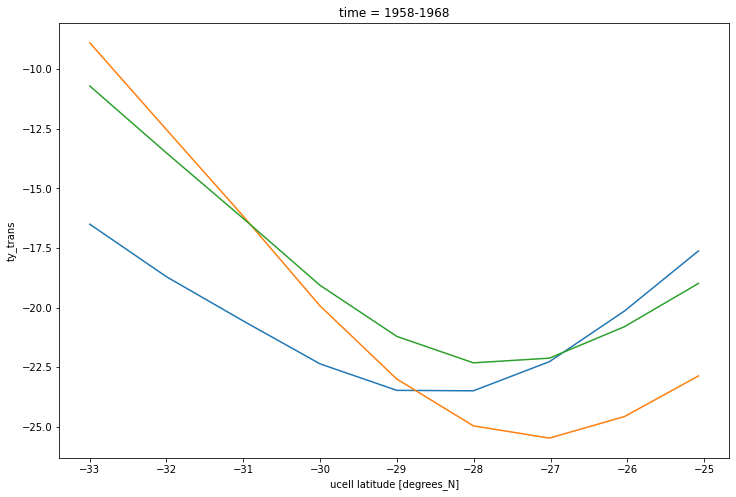

In [9]:
plt.figure(figsize(12,8))
a1[0].plot() #blue
a4[0].plot() #orange
a7[0].plot()

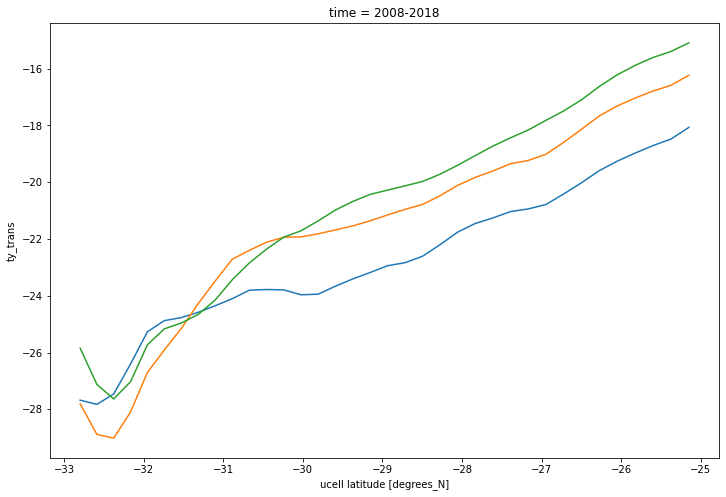

In [4]:
plt.figure(figsize(12,8))
a2[0].plot()
a5[0].plot()
a8[0].plot()

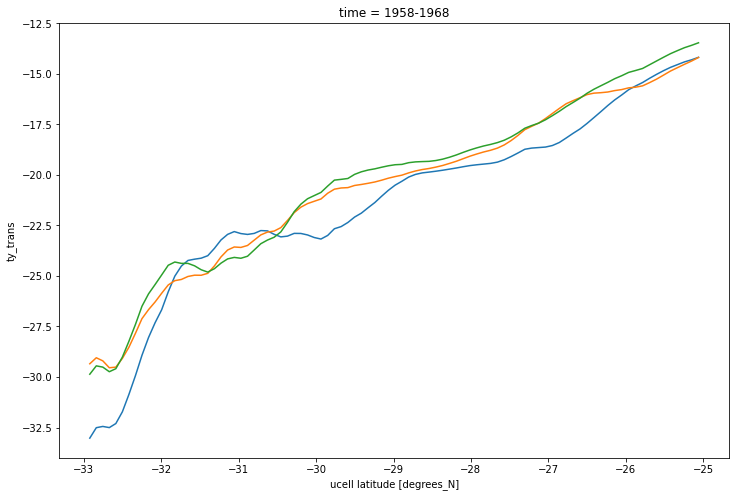

In [5]:
plt.figure(figsize(12,8))
a3[0].plot()
a6[0].plot()
a9[0].plot()